<a href="https://colab.research.google.com/github/MarjAlmarez/githubTest/blob/main/GCash_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [56]:
# Load the data from the CSV file
df = pd.read_csv('gcash_coded.csv')

In [57]:
# Display the first few rows of the dataframe
print(df.head())


  Date and Time                                        Description  Debit  \
0   1/5/21 0:41                               Payment to Dragonpay  300.0   
1   1/5/21 0:50                               Payment to Dragonpay   50.0   
2  1/6/21 18:34           Transfer from 09166573626 to 09501567919    0.0   
3  1/6/21 18:35  Payment to Food Panda Philippines Inc., Mercha...  216.0   
4  1/8/21 16:39           Transfer from 09567746080 to 09501567919    0.0   

   Credit           User    Date      Time    Year  Month  Day  ...  Week_4  \
0     0.0  davadilla7919  1/5/21   0:41:00  2021.0    1.0  5.0  ...     0.0   
1     0.0  davadilla7919  1/5/21   0:50:00  2021.0    1.0  5.0  ...     0.0   
2   220.0  davadilla7919  1/6/21  18:34:00  2021.0    1.0  6.0  ...     0.0   
3     0.0  davadilla7919  1/6/21  18:35:00  2021.0    1.0  6.0  ...     0.0   
4   700.0  davadilla7919  1/8/21  16:39:00  2021.0    1.0  8.0  ...     0.0   

   Week_5  Weekend_0  Weekend_1  Time_of_Day_Afternoon  \
0   

In [78]:
# Check for and remove duplicates
#df = df.drop_duplicates()

In [79]:
# Reset the index
df = df.reset_index(drop=True)

In [80]:
# Feature Engineering
df['Date and Time'] = pd.to_datetime(df['Date and Time'])
df['Date'] = df['Date and Time'].dt.date
df['Time'] = df['Date and Time'].dt.time
df['Year'] = df['Date and Time'].dt.year
df['Month'] = df['Date and Time'].dt.month
df['Day'] = df['Date and Time'].dt.day
df['Week_of_Month'] = df['Date and Time'].dt.weekday // 7 + 1
df['Week_of_Year'] = df['Date and Time'].dt.isocalendar().week
df['Is_Weekend'] = (df['Date and Time'].dt.weekday // 5).astype(int)
df['Hour'] = df['Date and Time'].dt.hour
df['Is_1st_to_3rd'] = (df['Day'].between(1, 3)).astype(int)
df['Is_14th_to_16th'] = (df['Day'].between(14, 16)).astype(int)
df['Is_Last_Three_Days'] = (df['Day'].between(df['Day'].max() - 2, df['Day'].max())).astype(int)
df['Time_of_Day'] = pd.cut(df['Hour'], bins=[0, 6, 12, 18, 24], labels=['Late Night', 'Morning', 'Afternoon', 'Night'])


In [81]:
# Select features for clustering
features_for_clustering = df[['Debit', 'Credit', 'Year', 'Month', 'Day', 'Week_of_Month', 'Week_of_Year', 'Is_Weekend', 'Hour', 'Is_1st_to_3rd', 'Is_14th_to_16th', 'Is_Last_Three_Days']]


In [82]:
# Handle missing values
imputer = SimpleImputer(strategy='mean')
features_for_clustering_imputed = imputer.fit_transform(features_for_clustering)

In [83]:
# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_for_clustering_imputed)

In [84]:
# Determine the optimal number of clusters using the Elbow Method
wcss = []  # Within-Cluster-Sum-of-Squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

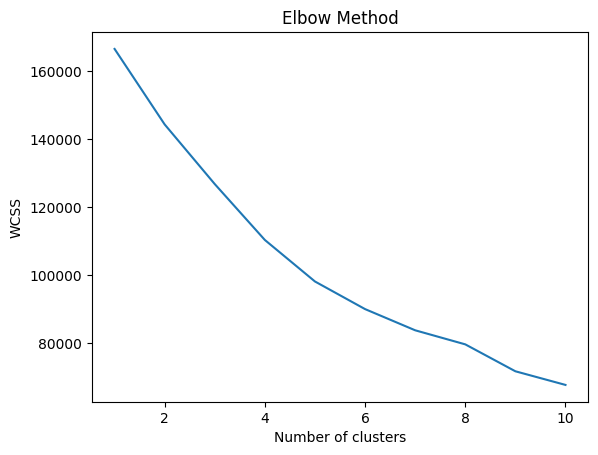

In [85]:
# Plot the Elbow Method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within-Cluster-Sum-of-Squares
plt.show()

In [112]:
# Based on the Elbow Method, choose the optimal number of clusters
optimal_clusters = 9  # Adjust as needed

In [87]:
print(df.isna().sum())

Date and Time                0
Description                  0
Debit                        0
Credit                       0
User                         0
Date                         0
Time                         0
Year                         0
Month                        0
Day                          0
Week_of_Month                0
Week_of_Year                 0
Is_Weekend                   0
Hour                         0
Is_1st_to_3rd                0
Is_14th_to_16th              0
Is_Last_Three_Days           0
Time of Day                  0
Year_2021                    0
Year_2022                    0
Year_2023                    0
Month_1                      0
Month_2                      0
Month_3                      0
Month_4                      0
Month_5                      0
Month_6                      0
Month_7                      0
Month_8                      0
Month_9                      0
Month_10                     0
Month_11                     0
Month_12

In [113]:
# Apply k-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
df['Cluster'] = kmeans.fit_predict(features_scaled)

In [114]:
# Perform k-means clustering (adjust the number of clusters as needed)
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(features_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


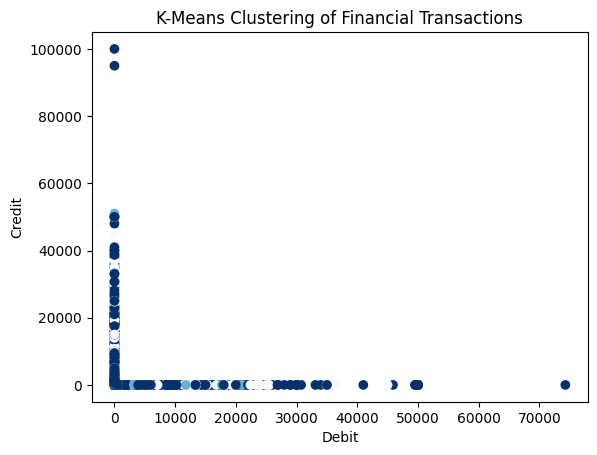

In [115]:
# EDA: Visualize clusters
plt.scatter(df['Debit'], df['Credit'], c=df['cluster'], cmap='Blues')
plt.title('K-Means Clustering of Financial Transactions')
plt.xlabel('Debit')
plt.ylabel('Credit')
plt.show()

In [92]:
print(df['Cluster'].value_counts())

1    6298
0    6056
2    1491
3    1292
Name: Cluster, dtype: int64


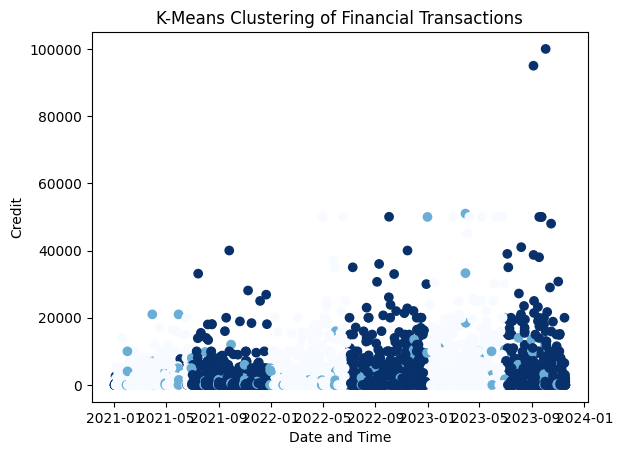

In [96]:
# EDA: Visualize clusters
plt.scatter(df['Date and Time'], df['Credit'], c=df['cluster'], cmap='Blues')
plt.title('K-Means Clustering of Financial Transactions')
plt.xlabel('Date and Time')
plt.ylabel('Credit')
plt.show()

In [116]:
print(df['Cluster'].value_counts())

4    3296
1    2713
7    2455
5    1851
3    1649
2    1461
6    1275
8     234
0     203
Name: Cluster, dtype: int64


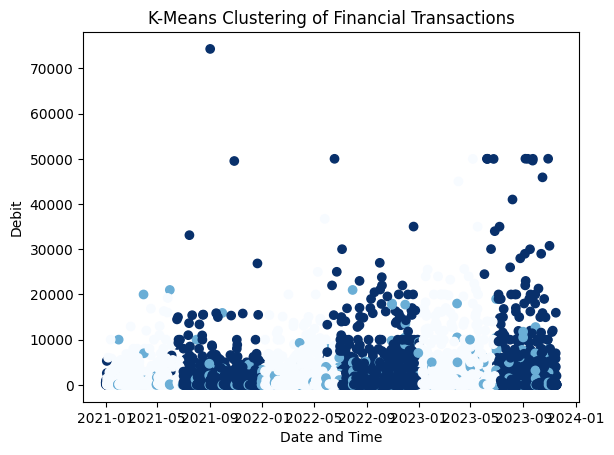

In [97]:
# EDA: Visualize clusters
plt.scatter(df['Date and Time'], df['Debit'], c=df['cluster'], cmap='Blues')
plt.title('K-Means Clustering of Financial Transactions')
plt.xlabel('Date and Time')
plt.ylabel('Debit')
plt.show()

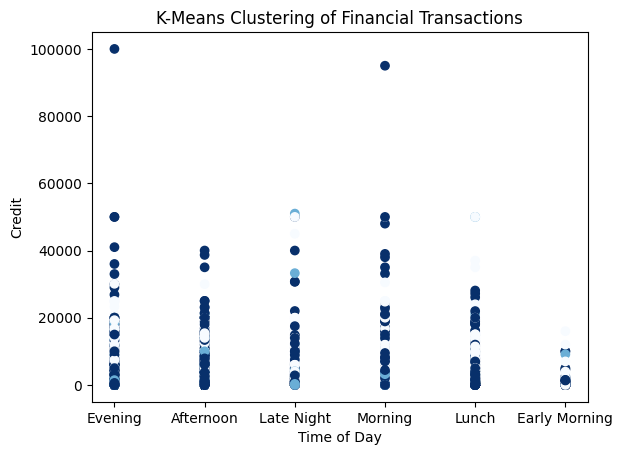

In [100]:
# EDA: Visualize clusters
plt.scatter(df['Time of Day'], df['Credit'], c=df['cluster'], cmap='Blues')
plt.title('K-Means Clustering of Financial Transactions')
plt.xlabel('Time of Day')
plt.ylabel('Credit')
plt.show()

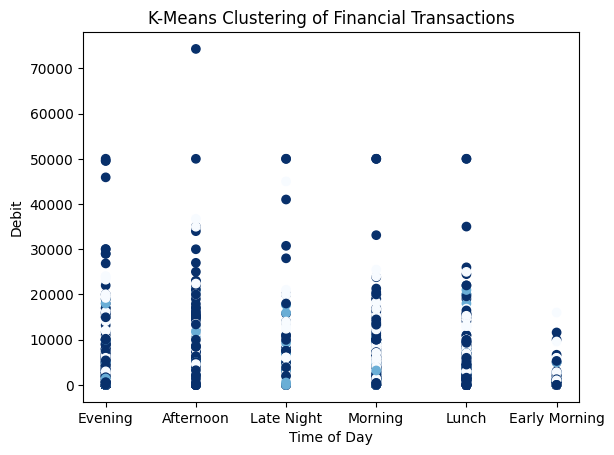

In [99]:
# EDA: Visualize clusters
plt.scatter(df['Time of Day'], df['Debit'], c=df['cluster'], cmap='Blues')
plt.title('K-Means Clustering of Financial Transactions')
plt.xlabel('Time of Day')
plt.ylabel('Debit')
plt.show()

) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


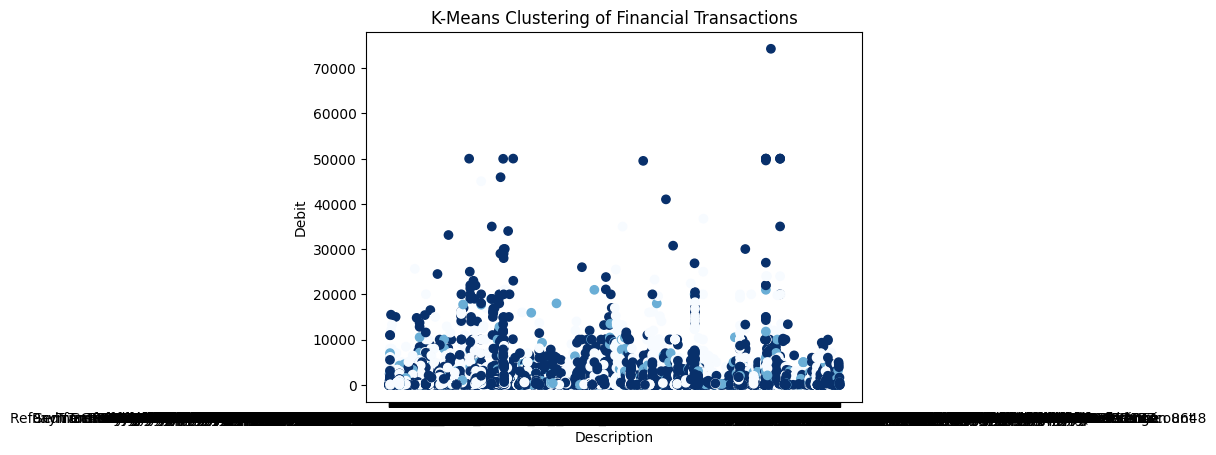

In [102]:
# EDA: Visualize clusters
plt.scatter(df['Description'], df['Debit'], c=df['cluster'], cmap='Blues')
plt.title('K-Means Clustering of Financial Transactions')
plt.xlabel('Description')
plt.ylabel('Debit')
plt.show()

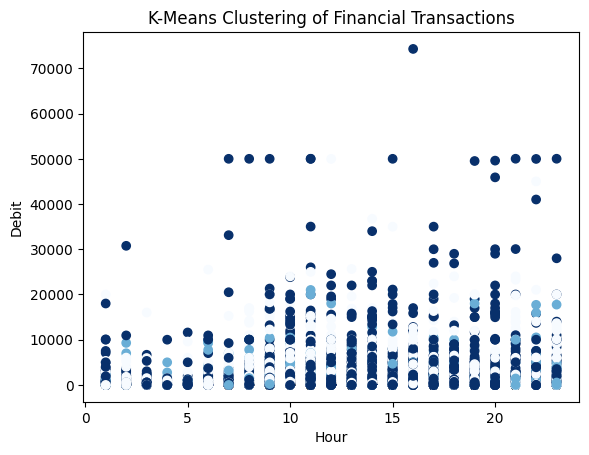

In [111]:
# EDA: Visualize clusters
plt.scatter(df['Hour'], df['Debit'], c=df['cluster'], cmap='Blues')
plt.title('K-Means Clustering of Financial Transactions')
plt.xlabel('Hour')
plt.ylabel('Debit')
plt.show()